In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


In [25]:
df = pd.read_excel("/content/students_performance.xlsx")
df.head()


,Student_ID,Gender,Study_Hours_per_Week,Attendance_Percentage,Previous_Sem_Score,Parental_Education,Internet_Access,Family_Income,Tutoring_Classes,Sports_Activity,Extra_Curricular,School_Type,Sleep_Hours,Travel_Time,Test_Anxiety_Level,Peer_Influence,Teacher_Feedback,Motivation_Level,Library_Usage_per_Week,Final_Score
0,S1000,Male,36.330635,86.628815,38.182863,Postgraduate,No,32727.500387,No,Yes,No,Private,6.777112,2.488956,4.526416,1.698767,Good,9.416549,4,44.293533
1,S1001,Female,9.582476,73.504255,95.788249,High School,No,42332.567312,No,Yes,No,Private,6.631231,2.192993,5.920305,8.459841,Excellent,4.382245,4,42.749974
2,S1002,Male,5.795795,65.453321,73.939564,High School,Yes,44142.273093,No,No,Yes,Private,5.311059,0.887486,5.788195,4.140011,Excellent,7.373097,5,29.846049
3,S1003,Male,19.578110,94.381263,53.443393,Graduate,Yes,64498.434188,No,No,Yes,Private,6.380781,1.267095,6.313880,5.694395,Good,5.281190,6,44.030395
4,S1004,Male,39.426018,46.671849,39.749045,Postgraduate,No,42105.884774,No,No,Yes,Private,4.266327,0.397970,1.551979,8.150371,Poor,7.069597,6,42.548877


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Student_ID              300 non-null    object 
 1   Gender                  300 non-null    object 
 2   Study_Hours_per_Week    300 non-null    float64
 3   Attendance_Percentage   300 non-null    float64
 4   Previous_Sem_Score      300 non-null    float64
 5   Parental_Education      300 non-null    object 
 6   Internet_Access         300 non-null    object 
 7   Family_Income           300 non-null    float64
 8   Tutoring_Classes        300 non-null    object 
 9   Sports_Activity         300 non-null    object 
 10  Extra_Curricular        300 non-null    object 
 11  School_Type             300 non-null    object 
 12  Sleep_Hours             300 non-null    float64
 13  Travel_Time             300 non-null    float64
 14  Test_Anxiety_Level      300 non-null    fl

In [27]:
num_cols = ['Study_Hours_per_Week','Attendance_Percentage','Previous_Sem_Score','Family_Income']
df_num = df[num_cols]

In [28]:
df_num = df_num.dropna()

In [29]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_num)

In [30]:
wcss = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)


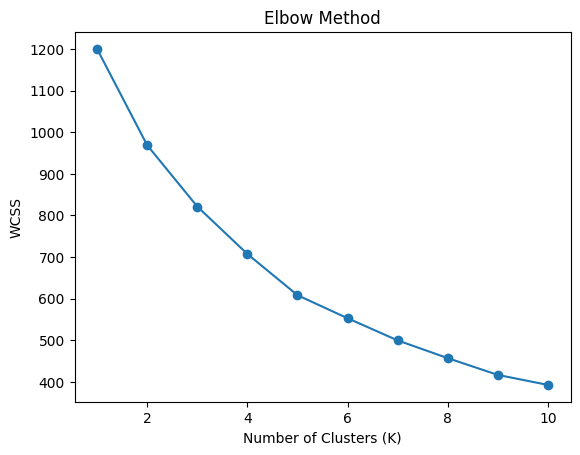

In [31]:
plt.plot(range(1, 11), wcss, marker='o')
plt.title("Elbow Method")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("WCSS")
plt.show()


In [32]:
k = 3
kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
clusters = kmeans.fit_predict(scaled_data)


In [33]:
df['Cluster'] = clusters
df.head()


,Student_ID,Gender,Study_Hours_per_Week,Attendance_Percentage,Previous_Sem_Score,Parental_Education,Internet_Access,Family_Income,Tutoring_Classes,Sports_Activity,...,School_Type,Sleep_Hours,Travel_Time,Test_Anxiety_Level,Peer_Influence,Teacher_Feedback,Motivation_Level,Library_Usage_per_Week,Final_Score,Cluster
0,S1000,Male,36.330635,86.628815,38.182863,Postgraduate,No,32727.500387,No,Yes,...,Private,6.777112,2.488956,4.526416,1.698767,Good,9.416549,4,44.293533,1
1,S1001,Female,9.582476,73.504255,95.788249,High School,No,42332.567312,No,Yes,...,Private,6.631231,2.192993,5.920305,8.459841,Excellent,4.382245,4,42.749974,2
2,S1002,Male,5.795795,65.453321,73.939564,High School,Yes,44142.273093,No,No,...,Private,5.311059,0.887486,5.788195,4.140011,Excellent,7.373097,5,29.846049,0
3,S1003,Male,19.578110,94.381263,53.443393,Graduate,Yes,64498.434188,No,No,...,Private,6.380781,1.267095,6.313880,5.694395,Good,5.281190,6,44.030395,2
4,S1004,Male,39.426018,46.671849,39.749045,Postgraduate,No,42105.884774,No,No,...,Private,4.266327,0.397970,1.551979,8.150371,Poor,7.069597,6,42.548877,1


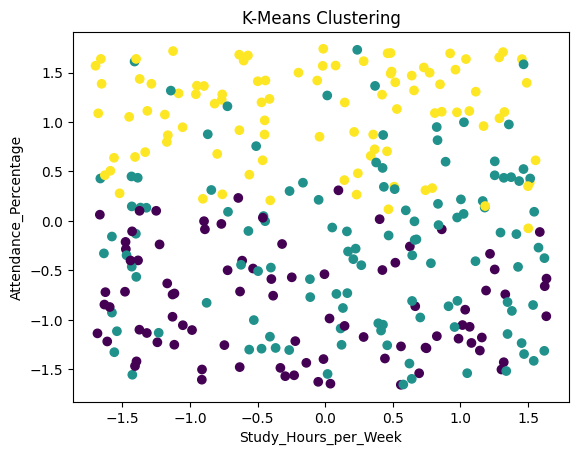

In [34]:
plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=clusters)
plt.title("K-Means Clustering")
plt.xlabel(num_cols[0])
plt.ylabel(num_cols[1])
plt.show()
